In [2]:
# Линейная регрессия

In [3]:
# Задача : на основе наблюдаемых точек построить прямую, которая отрбражает связь 

In [4]:
#между двумя и более переменными

In [5]:
#Регрессия пытается "подогнать" функцию к наблюдаемым данным, чтобы спрогнозировать новые данные

In [6]:
#Линейная регрессия подгоняет данные к прямой линии, пытается установить линейную связь между переменными  и предсказать данные

In [7]:
import numpy as np
from numpy.linalg import inv, qr
import random


In [8]:
from sklearn.datasets import make_regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
import matplotlib.pyplot as plt

In [11]:
features, target = make_regression(
    n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=15, random_state=1
)

print(features.shape)

print(target.shape)

(100, 1)
(100,)


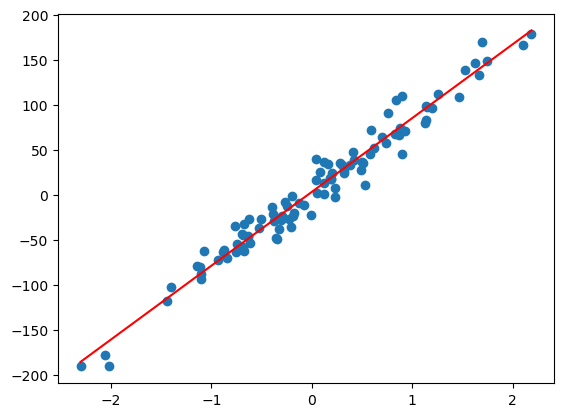

In [12]:
model = LinearRegression().fit(features, target)

plt.scatter(features, target)

x = np.linspace(features.min(), features.max(), 100)
# y = kx + b

plt.plot(x, model.coef_[0] * x + model.intercept_, color='red')

plt.show()


In [13]:
## Простая регрессия

In [14]:
# Линейная подразумевает линейную зависимость
# + пронозированние на новых данных
# + анализ взаимного влияния переменных друг на друга

# - точки получаеммых данных НЕ будут точно лежать на прямой (шума) => область погрешности
# - НЕ позволяет делать прогнозы ВНЕ имеющихся данных

In [15]:
# Данные, на основании которых разрабатывается модель - это выборка из совокупности, хотелось бы, чтобы  это была РЕПРЕЗИТИВНАЯ выборка 

In [16]:
# Аналитический метод
data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)

w_1 = (
    n * sum(x[i] * y[i] for i in range (n)) - sum(x[i]  for i in range (n)) * sum(y[i]  for i in range (n)) 
) / (n *  sum(x[i] ** 2  for i in range (n)) - sum(x[i]  for i in range (n)) ** 2)  

w_0 = (sum(y[i] for i in range (n)) / n) - w_1* (sum(x[i] for i in range(n)))/n

print(w_1, w_0)
#2.4 0.8

2.4 0.8000000000000007


In [17]:
# Метод обратных матриц
x_1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x_1.transpose() @ x_1) @ (x_1.transpose() @ y)

print(w)

[2.4 0.8]


In [18]:
# Разложение матриц

Q, R = qr(x_1)
w = inv(R).dot(Q.transpose()).dot(y)

print(w)

[2.4 0.8]


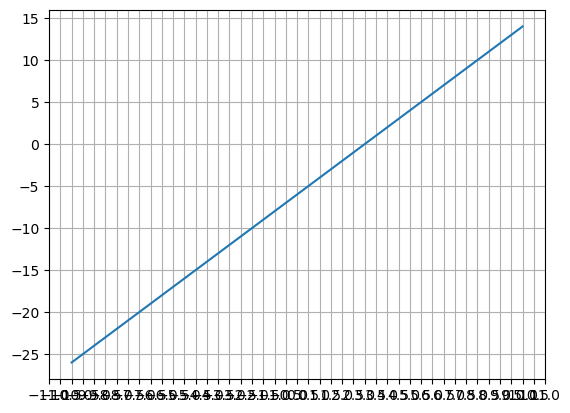

In [19]:
# Градиентный спуск (метод оптимизации)
def f(x):
    return (x-3)**2 + 4

def dx_f(x):
    return 2*x - 6 


x = np.linspace(-10,10,100)

ax = plt.gca()

ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))

#plt.plot(x, f(x))
plt.plot(x, dx_f(x))
plt.grid()

plt.show()


In [20]:
L = 0.001

iterations = 100_000

x = random.randint(0, 5)

for i in range(iterations):
    d_x = dx_f(x)
    x -= L*d_x

print(x, f(x))

2.999999999999889 4.0


In [45]:
data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)

x = data[:, 0]
y = data[:, 1]

n = len(x)

w1 = 0.0
w0=0.0

L = 0.001

iterations = 100_000
for i in range(iterations):
    D_w0 = 2* sum( (-y[i] + w0 + w1 * x[i]) for i in range(n))
    D_w1 = 2 * sum(x[i] * (-y[i] + w0 + w1 * x[i]) for i in range(n)) 
    w1 -= L * D_w1
    w0 -= L*D_w0

print(w1, w0)

2.4000000000000026 0.7999999999999835


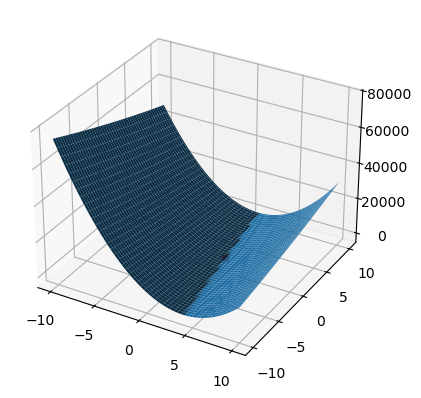

In [22]:
w1 = np.linspace(-10,10,100)
w0 = np.linspace(-10,10,100)

def E(w1, w0, x, y):
    return sum((y[i] - (w0 + w1 * x[i]))**2 for i in range(len(x)))

W1, W0 = np.meshgrid(w1,w0)

EW = E(W1, W0, x, y)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(W1, W0, EW)

w1_fit = 2.4
w0_fit = 0.8

E_fit = E(w1_fit, w0_fit, x, y)

ax.scatter3D(w1_fit, w0_fit, E_fit, color="red")
plt.show()
